<a href="https://colab.research.google.com/github/Jenkidamaa/DeepLearning-estudos/blob/main/Ex2_termo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeramente encontramos os valores de B11 e B22 utilizando a correlação de Abott


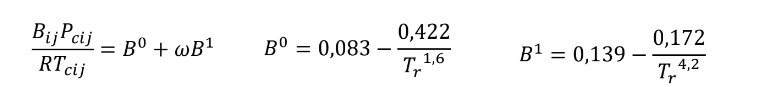

In [ ]:
import pandas

Ts = float(input("Digite a temperatura do sistema "))
Tc = float(input("Digite a temperatura critica do componente "))


def calcula_B0(Tc):
  Tr = Ts/Tc
  B0 = 0.083-0.422/(Tr**(1.6))
  return B0

def calcula_B1(Tc):
  Tr = float(Ts/Tc)
  B1 = 0.139-0.172/(Tr**4.2)
  return B1

B0 = calcula_B0(Tc)
B1 = calcula_B1(Tc)

print(f"B0 =  {B0:.4}" )
print(f"B1 = {B1:.4}" )


def calculo_Bij(Tcij, Pcij, B0 , B1, w):
  Bij = (0.00008314)*(Tcij/Pcij)*(B0+w*B1)
  return Bij

print(f"B11 = {calculo_Bij(305.3,48.72,calcula_B0(Tc),calcula_B1(Tc),0.1):.4}", )




Digite a temperatura do sistema 373.15
Digite a temperatura critica do componente 425.1
B0 =  -0.4369
B1 = -0.1584
B11 = -0.0002358


In [ ]:
#Para o calculo dos coeficientes cruzados

#Dados para o etanol
Tc1 = 305.3
Pc1 = 48.72
vc1 = 0.000145
Zc1 = 0.279
w1  = 0.1

#Dados para o etanol
Tc2 = 425.1
Pc2 = 37.96
vc2 = 0.000255
Zc2 = 0.274
w2  = 0.2


Tc12 = (Tc1*Tc2)**(0.5)
Zc12 = (Zc1+Zc2)/2
w12 = (w1+w2)/2
vc12 = (((vc1)**(1/3)+(vc2)**(1/3))/2)**3
Pc12 = ((Zc12)*(0.00008134)*Tc12)/vc12

#Chamando as funções para o calculo do coeficiente cruzado de Abott

print(f"B12 = {calculo_Bij(Tc12,Pc12,calcula_B0(Tc12),calcula_B1(Tc12),w12):.4}", )




B11 = -0.0002286


In [ ]:
#Para o calculo da mistrura
B11 = -0.000112
B22 = -0.0002358
B12 = -0.0002286
#estabelenco os vetores de concentração Y1
y1 = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
y2 = [0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

#Gerando os valores Bm1 onde se varia a fração y1 e fixa y2
Bm1x = []
Bm1 = []

for i in range(0,10):
  for j in range(0,10):
    x = (y1[j]**2)*B11+ 2*y1[j]*y2[i]*B12+(y2[i]**2)*B22
    Bm1x.append(x)
  Bm1.append(Bm1x)
  Bm1x = []

#Gerando os valores Bm2 onde se varia a fração y2 e fixa y1
Bm2x = []
Bm2 = []

for i in range(0,10):
  for j in range(0,10):
    x = (y1[i]**2)*B11+ 2*y1[i]*y2[j]*B12+(y2[j]**2)*B22
    Bm2x.append(x)
  Bm2.append(Bm2x)
  Bm2x = []

x = float()






for i in range(0,10):
  print(Bm1[i])

print("="*10)

for i in range(0,10):
  print(Bm2[i])


[-0.0, -1.1200000000000003e-06, -4.480000000000001e-06, -1.008e-05, -1.7920000000000005e-05, -2.8e-05, -4.032e-05, -5.487999999999999e-05, -7.168000000000002e-05, -9.072e-05]
[-2.3580000000000005e-06, -8.050000000000003e-06, -1.5982000000000004e-05, -2.6154e-05, -3.856600000000001e-05, -5.3218e-05, -7.011e-05, -8.9242e-05, -0.00011061400000000004, -0.00013422599999999999]
[-9.432000000000002e-06, -1.9696000000000003e-05, -3.220000000000001e-05, -4.6943999999999996e-05, -6.392800000000002e-05, -8.3152e-05, -0.000104616, -0.00012832, -0.00015426400000000004, -0.000182448]
[-2.1222e-05, -3.6058e-05, -5.3134e-05, -7.245e-05, -9.4006e-05, -0.000117802, -0.000143838, -0.00017211399999999999, -0.00020263, -0.000235386]
[-3.772800000000001e-05, -5.713600000000002e-05, -7.878400000000001e-05, -0.000102672, -0.00012880000000000004, -0.000157168, -0.00018777599999999999, -0.00022062399999999997, -0.00025571200000000006, -0.00029304000000000005]
[-5.895e-05, -8.293000000000001e-05, -0.00010915, -0

Text(0, 0.5, 'Coeficiente de fugacidade')

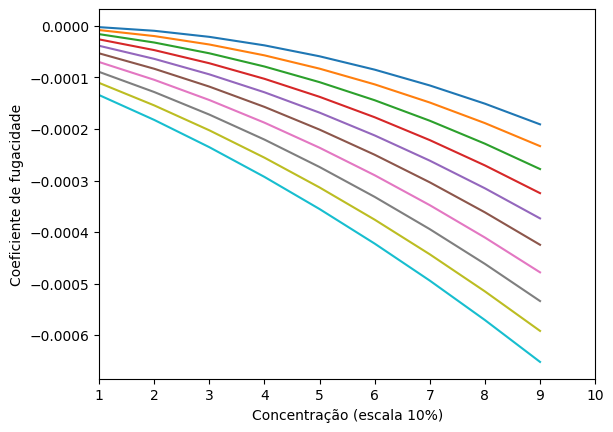

In [ ]:
#para gerar os graficos vamos utilizar a biblioteca matplotlib

import matplotlib

matplotlib.pyplot.plot(Bm1)
matplotlib.pyplot.xlim(1,10)
matplotlib.pyplot.xlabel('Concentração (escala 10%)')
matplotlib.pyplot.ylabel("Coeficiente de fugacidade")

Text(0, 0.5, 'Coeficiente de fugacidade')

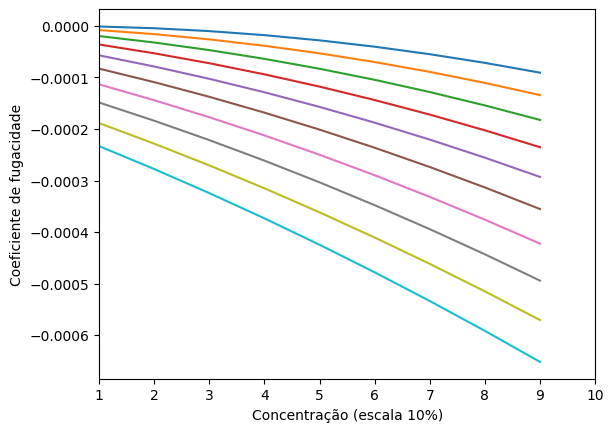

In [ ]:
#para gerar os graficos vamos utilizar a biblioteca matplotlib

import matplotlib

matplotlib.pyplot.plot(Bm2
                       )
matplotlib.pyplot.xlim(1,10)
matplotlib.pyplot.xlabel('Concentração (escala 10%)')
matplotlib.pyplot.ylabel("Coeficiente de fugacidade")